# Audio Data Generation

In [1]:
import os
import numpy as np
import pandas as pd
import wave
import librosa
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import soundfile as sf
%matplotlib inline

In [13]:
root_dir = '/home/zlh/DAIC/'
number = 348
participant = "{}_P".format(number)
audio_file = '{}_AUDIO.wav'.format(number)
transcipt_file = "{}_TRANSCRIPT.csv".format(number)

wavefile = wave.open(os.path.join(root_dir, participant, audio_file))
audio_sr = wavefile.getframerate()
n_samples = wavefile.getnframes()
signal = np.frombuffer(wavefile.readframes(n_samples), dtype=np.short)
T = signal.shape[0]

transcript = pd.read_csv(os.path.join(root_dir, participant,transcipt_file), sep='\t').fillna('')
first_start_time = transcript['start_time'][0]
last_stop_time = transcript['stop_time'][len(transcript)-1]

# original audio signal

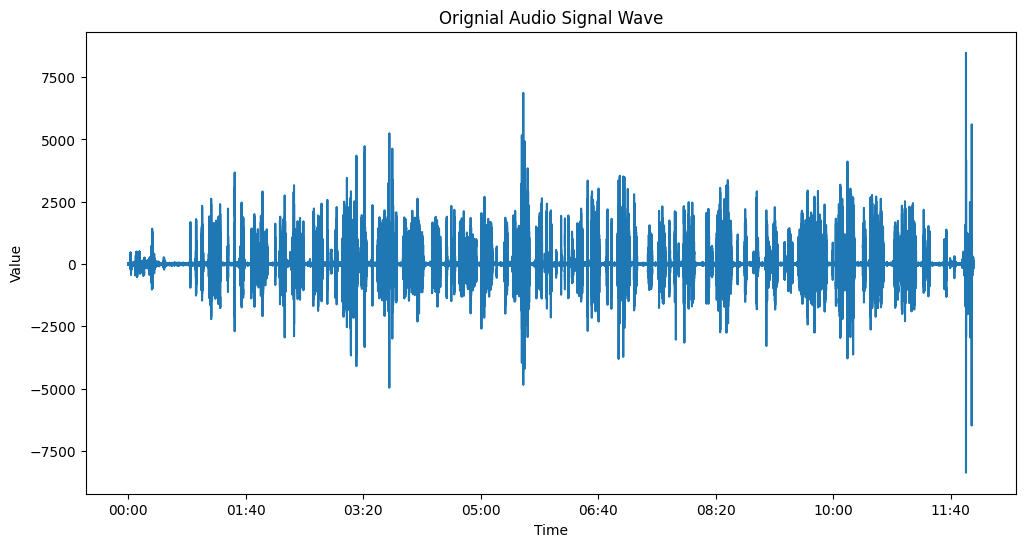

In [7]:
Time = np.linspace(0, T/audio_sr, num=T) # in s

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Time, signal)

def x_fmt(x, y):
    minute = int(x // 60)
    second = int(x % 60)
    return f'{minute:02}:{second:02}'

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Orignial Audio Signal Wave")
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))

plt.show()

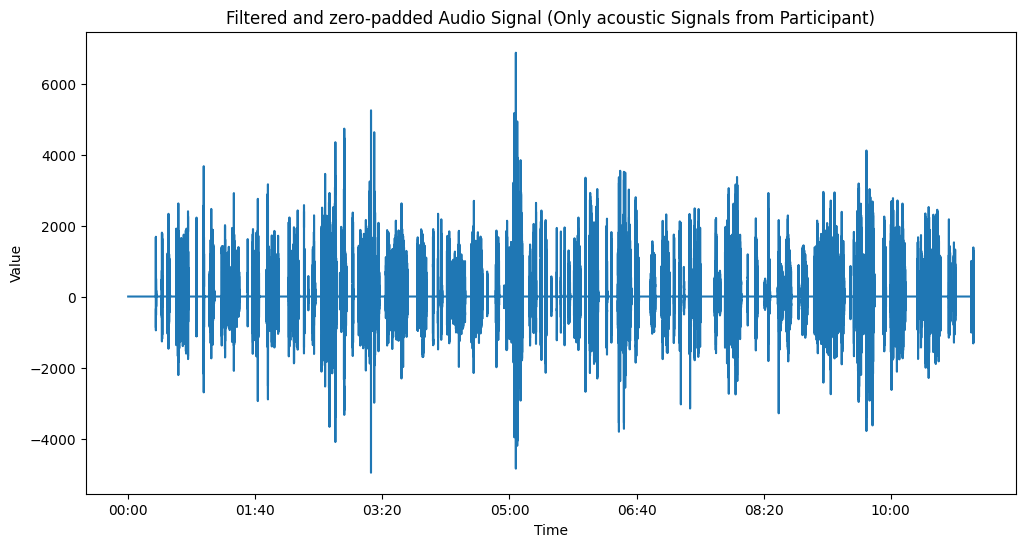

In [8]:
# Filtered and zero-padded Audio Signal and cut start and end (Only acoustic Signals from Participant)

filtered_signal = np.zeros(signal.shape[0])

# filtering
for t in transcript.itertuples():
    if getattr(t,'speaker') == 'Participant':
        start = getattr(t,'start_time')
        stop = getattr(t,'stop_time')

        filtered_signal[int(start*audio_sr):int(stop*audio_sr)] = signal[int(start*audio_sr):int(stop*audio_sr)]

# cut start and end
filtered_signal = filtered_signal[int(first_start_time*audio_sr):int(last_stop_time*audio_sr)]

# plot
Time = np.linspace(0, filtered_signal.shape[0]/audio_sr, num=filtered_signal.shape[0]) # in s

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Time, filtered_signal)

def x_fmt(x, y):
    minute = int(x // 60)
    second = int(x % 60)
    return f'{minute:02}:{second:02}'

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Filtered and zero-padded Audio Signal (Only acoustic Signals from Participant)")
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))

plt.show()

# Clipped Audio Signal and cut start and end (Only acoustic Signals from Participant)

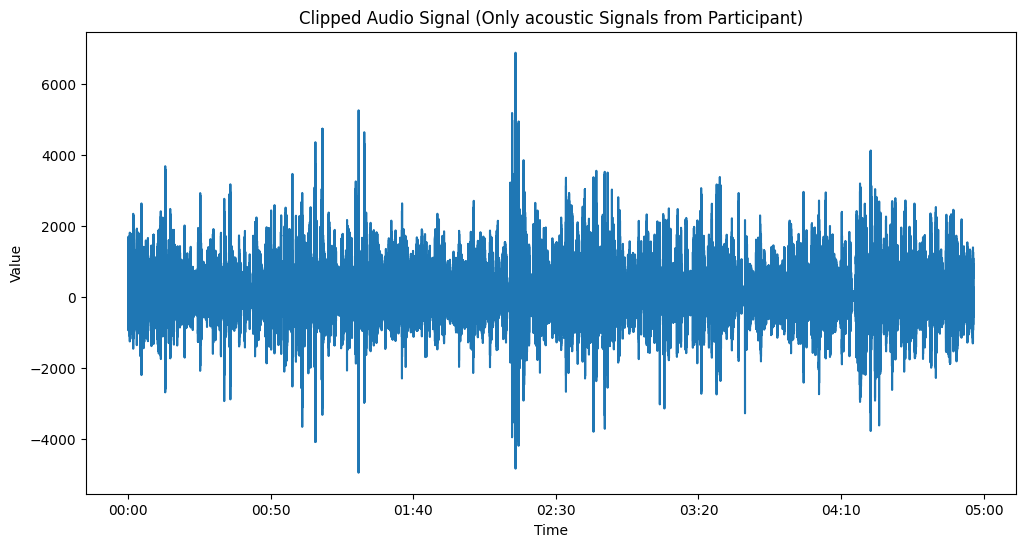

In [9]:
# filter out others besides participant and clipped

clipped_signal = []

for t in transcript.itertuples():
    if getattr(t,'speaker') == 'Participant':
        start = getattr(t,'start_time')
        stop = getattr(t,'stop_time')

        clipped_signal = np.hstack((clipped_signal, signal[int(start*audio_sr):int(stop*audio_sr)]))

# plot
Time = np.linspace(0, clipped_signal.shape[0]/audio_sr, num=clipped_signal.shape[0]) # in s

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Time, clipped_signal)

def x_fmt(x, y):
    minute = int(x // 60)
    second = int(x % 60)
    return f'{minute:02}:{second:02}'

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Clipped Audio Signal (Only acoustic Signals from Participant)")
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))

plt.show()

In [12]:
clipped_signal.shape


(4743840,)

In [23]:
import pandas as pd

gt_path = '/home/zlh/DAIC/full_test_split.csv'
gt_df = pd.read_csv(gt_path)

In [24]:
gt_df

,Participant_ID,PHQ_Binary,PHQ_Score,Gender
0,NaN,NaN,NaN,NaN
1,300.0,0.0,2.0,1.0
2,NaN,NaN,NaN,NaN
3,301.0,0.0,3.0,1.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
89,470.0,0.0,3.0,0.0
90,NaN,NaN,NaN,NaN
91,480.0,0.0,1.0,1.0
92,NaN,NaN,NaN,NaN


In [25]:
gt_df_1=gt_df.dropna().reset_index(drop=True)

In [26]:
gt_df_1

,Participant_ID,PHQ_Binary,PHQ_Score,Gender
0,300.0,0.0,2.0,1.0
1,301.0,0.0,3.0,1.0
2,306.0,0.0,0.0,0.0
3,308.0,1.0,22.0,0.0
4,309.0,1.0,15.0,1.0
5,311.0,1.0,21.0,0.0
6,314.0,0.0,1.0,0.0
7,323.0,0.0,1.0,0.0
8,329.0,0.0,1.0,1.0
9,332.0,1.0,18.0,0.0


In [27]:
gt_df_1.astype(int)

,Participant_ID,PHQ_Binary,PHQ_Score,Gender
0,300,0,2,1
1,301,0,3,1
2,306,0,0,0
3,308,1,22,0
4,309,1,15,1
5,311,1,21,0
6,314,0,1,0
7,323,0,1,0
8,329,0,1,1
9,332,1,18,0


# concatenate trian feature

In [1]:
import numpy as np
import os

In [2]:
labels=np.load('/home/zlh/DAIC_WOZ-generated_database_4/train/clipped_data/no_gender_balance/phq_binary_gt.npy')

In [3]:
folder_path = '/home/zlh/DAIC_WOZ-generated_database_4/train/clipped_data/no_gender_balance/audio/origin'
npy_files =  [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

# 初始化一个空列表来存储加载的数组
data_list = []

# 逐个加载.npy文件并添加到列表中
for file in npy_files:
    data = np.load(file)
    data_list.append(data)

# 将列表中的数组合并成一个大的数组
features = np.concatenate(data_list, axis=0)

In [4]:
features

array([[0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [5]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
# 保存为 NPZ 文件
np.savez('/home/zlh/DAIC_WOZ-generated_database_4/train/clipped_data/no_gender_balance/audio/MODMA_features_train.npz', features=features, labels=labels)

# concatenate val feature

In [7]:
import numpy as np
import os

labels=np.load('/home/zlh/DAIC_WOZ-generated_database_4/validation/clipped_data/no_gender_balance/phq_binary_gt.npy')

folder_path = '/home/zlh/DAIC_WOZ-generated_database_4/validation/clipped_data/no_gender_balance/audio/origin'
npy_files =  [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

# 初始化一个空列表来存储加载的数组
data_list = []

# 逐个加载.npy文件并添加到列表中
for file in npy_files:
    data = np.load(file)
    data_list.append(data)

# 将列表中的数组合并成一个大的数组
features = np.concatenate(data_list, axis=0)

In [8]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
features

array([[0.00074263, 0.00012373, 0.0006189 , ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.00012373, 0.0006189 , ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0006189 , 0.        , 0.0006189 , ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [10]:
# 保存为 NPZ 文件
np.savez('/home/zlh/DAIC_WOZ-generated_database_4/validation/clipped_data/no_gender_balance/audio/MODMA_features_val.npz', features=features, labels=labels)

# concatenate all feature

In [11]:
# 加载和处理数据
data1 = np.load("/home/zlh/DAIC_WOZ-generated_database_4/train/clipped_data/no_gender_balance/audio/MODMA_features_train.npz")
data2 = np.load("/home/zlh/DAIC_WOZ-generated_database_4/validation/clipped_data/no_gender_balance/audio/MODMA_features_val.npz")

combined_data = np.concatenate((data1['features'], data2['features']), axis=0)
combined_labels = np.concatenate((data1['labels'], data2['labels']), axis=0)

In [12]:
combined_data

array([[0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0006189 , 0.        , 0.0006189 , ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ],
       [0.00074263, 0.        , 0.00074263, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [13]:
np.savez('/home/zlh/DAIC_WOZ-generated_database_4/DAIC_features_all.npz', features=combined_data, labels=combined_labels)

# concatenate test feature

In [54]:
import numpy as np
import os

labels=np.load('/home/zlh/DAIC_WOZ-generated_database/test/clipped_data/no_gender_balance/phq_binary_gt.npy')

folder_path = '/home/zlh/DAIC_WOZ-generated_database/test/clipped_data/no_gender_balance/audio/origin'
npy_files =  [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

# 初始化一个空列表来存储加载的数组
data_list = []

# 逐个加载.npy文件并添加到列表中
for file in npy_files:
    data = np.load(file)
    data_list.append(data)

# 将列表中的数组合并成一个大的数组
features = np.concatenate(data_list, axis=0)

In [55]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
features

array([[7.4225391e-04, 3.5496914e-11, 7.4225385e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4228412e-04, 1.3523240e-09, 7.4228278e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4240495e-04, 2.3513236e-10, 7.4240472e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.4223877e-04, 7.1007304e-11, 7.4223871e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4242003e-04, 8.8980955e-11, 7.4241991e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4154424e-04, 0.0000000e+00, 7.4154424e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [57]:
# 保存为 NPZ 文件
np.savez('/home/zlh/DAIC_WOZ-generated_database/test/clipped_data/no_gender_balance/audio/MODMA_features_test.npz', features=features, labels=labels)